In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/full_song_lyrics.csv')

In [3]:
df.columns

Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id',
       'language_cld3', 'language_ft', 'language'],
      dtype='object')

In [4]:
df = df.query('language == "en" and language_cld3 == "en" and language_ft == "en"')

In [5]:
df.iloc[0]

title                                                    Killa Cam
tag                                                            rap
artist                                                     Cam'ron
year                                                          2004
views                                                       173166
features                               {"Cam\\'ron","Opera Steve"}
lyrics           [Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...
id                                                               1
language_cld3                                                   en
language_ft                                                     en
language                                                        en
Name: 0, dtype: object

In [6]:
df = df[['tag', 'lyrics', 'features']]

In [7]:
df.to_csv('data/full_song_lyrics.csv', index=False)

In [8]:
df.shape

(3374198, 3)

In [10]:
df['features'].iloc[0]

'{"Cam\\\\\'ron","Opera Steve"}'

In [9]:
df['lyrics'].iloc[0]

'[Chorus: Opera Steve & Cam\'ron]\nKilla Cam, Killa Cam, Cam\nKilla Cam, Killa Cam\nKilla Cam, Cam\nKilla Cam, Killa Cam, Cam\nKilla Killa Killa Cam\nKilla Cam, Cam, Killa (Killa!)\nKilla Cam, Killa Cam, Cam (Bases loaded)\nKilla Cam, Killa Cam (Uh-huh)\nKilla Cam, Cam (Santana on second, Jim on third)\nKilla Cam, Killa Cam, Cam (I\'m at bat)\nKilla Killa Killa Cam\nKilla Cam, Cam, Killa (I\'m \'bout to hit this shit out the world)\nKilla Cam (Ugh, Heatmakerz), Killa Cam, Cam\nKilla Cam, Killa Cam\nKilla Cam, Cam (Hahahaha)\nKilla Cam, Killa Cam, Cam\nKilla Killa Killa Cam\nKilla Cam, Cam, Killa (We  make this shit clap)\nKilla Cam, Killa Cam, Cam\nKilla Cam, Killa Cam\nKilla Cam, Cam\nKilla Cam, Killa Cam, Cam\nKilla Killa Killa Cam (Killa! Killa!)\nKilla Cam, Cam, Killa\n[Verse 1]\nWith the goons I spar, stay in tune with ma (What up?)\nShe like, "Damn, this the realest since \'Kumbaya\'"\nBomaye, Killa Cam, my Lord (My Lord)\nStill the man with the pan, scrilla, fam, on board\nNow b

In [11]:
df_filtered = df[df['lyrics'].str.len() <= 1024]

In [13]:
df_filtered['lyrics'].iloc[0]

"Now if I see it in my dreams\nIs it for real? Somebody tell me what it means\nSometimes it ain't really what it seems\nCause this could all really be a dream\nIs it a dream? Is it a dream?\nAm I living what I'm seeing in my sleep?\nOr is my imagination tripping off some weed?\nIs this all the shit I really need?\nIn my dream, is this a dream?\nWill my dreams make it past here?\nOr will I always try to do better than last year?\nI'm not afraid of what the future brings\nBut this a dream, a vivid dream, it's in my dreams\nI already see it in my dreams"

<Axes: xlabel='genre', ylabel='counts'>

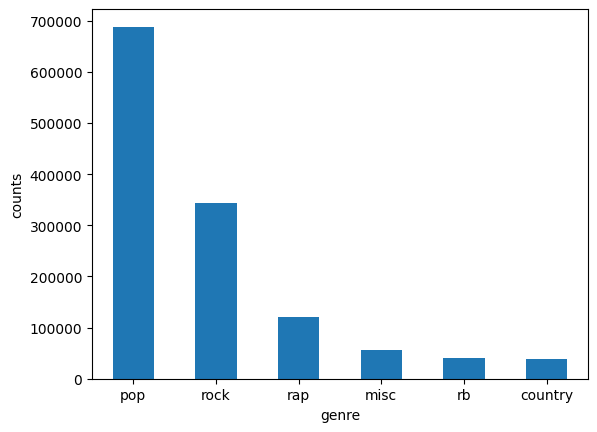

In [14]:
df_filtered["tag"].value_counts().plot(kind="bar", xlabel="genre", ylabel="counts", rot=0)

In [15]:
def g(df):
  """Samples the dataframe uniformly such that the number of elements in each category
  is equal to the minimum number of elements across all categories.

  Args:
      df: The pandas dataframe to be sampled.

  Returns:
      A new dataframe with a uniform distribution of categories.
  """
  n_sample = min(df['tag'].value_counts())  # Get the minimum count
  return df.sample(n_sample, replace=True)  # Sample with replacement to ensure all categories are present

result = g(df_filtered.copy())
print(result['tag'].value_counts())

tag
pop        20496
rock       10218
rap         3545
misc        1633
rb          1202
country     1124
Name: count, dtype: int64


In [17]:
print(df_filtered['tag'].value_counts())

tag
pop        688511
rock       343476
rap        119902
misc        56369
rb          40922
country     38218
Name: count, dtype: int64


In [16]:
df.columns

Index(['tag', 'lyrics', 'features'], dtype='object')

In [18]:
import pandas as pd

def balanced_sample(dataframe, column_name, sample_size=500):
  """
  Samples a dataframe such that each category in a specific column has a desired sample size.

  Args:
      dataframe: The pandas dataframe to sample from.
      column_name: The name of the column containing the categories.
      sample_size: The desired number of rows for each category (default: 800).

  Returns:
      A new dataframe containing the balanced sample.
  """
  balanced_df = pd.DataFrame()
  for category in dataframe[column_name].unique():
    category_df = dataframe[dataframe[column_name] == category]
    if len(category_df) >= sample_size:
      balanced_df = pd.concat([balanced_df, category_df.sample(sample_size)])
    else:
      balanced_df = pd.concat([balanced_df, category_df])
  return balanced_df

# Example usage
# Assuming you have a pandas dataframe 'df'
sampled_df = balanced_sample(df_filtered, "tag")


In [21]:
sampled_df[['tag', 'lyrics']].to_csv('data/small_songs_lyrics.csv', index=False)